# Orbital-resolved and k-resolved bonding descriptors

In [1]:
%config InlineBackend.figure_format = 'retina'

![The structure of diamond with a single Wannier function plotted](images/structure.png)

In [the basics](basics), we demonstrated the core functionality of `pengwann` by calculating, integrating and plotting the Wannier orbital Hamilton population (WOHP) and the Wannier orbital bond index (WOBI) for the C-C bond in diamond. We will now return to diamond once again to give a more detailed account of the outputs of `pengwann`, particularly with regards to resolving descriptors such as the WOHP with respect to axes other than the energy alone.

## Orbital-resolved descriptors

### Manipulating `Interaction` objects

In [2]:
from pengwann.geometry import Geometry, identify_interatomic_interactions

cutoffs = {('C', 'C'): 1.6}

geometry = Geometry.from_xyz(seedname='wannier90', path='inputs')
interactions = identify_interatomic_interactions(geometry, cutoffs)

print(interactions)

Atomic interactions
C8 <=> C9



As introduced in [the basics](basics), the interaction between two atoms *i* and *j* is represented by an {py:class}`~pengwann.interactions.AtomicInteraction` data structure:

In [3]:
print(interactions[8, 9])

Atomic interaction C8 <=> C9
DOS matrix => Not calculated
WOHP => Not calculated
WOBI => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated
Charge => Not calculated


Associated Wannier interactions
-------------------------------
0[0, 0, 1] <=> 1[0, 0, 0]
0[0, 0, 1] <=> 3[0, 0, 0]
0[0, 0, 1] <=> 4[0, 0, 0]
0[0, 0, 1] <=> 7[0, 0, 0]
2[1, 0, 0] <=> 1[0, 0, 0]
2[1, 0, 0] <=> 3[0, 0, 0]
2[1, 0, 0] <=> 4[0, 0, 0]
2[1, 0, 0] <=> 7[0, 0, 0]
5[1, 1, 1] <=> 1[0, 0, 0]
5[1, 1, 1] <=> 3[0, 0, 0]
5[1, 1, 1] <=> 4[0, 0, 0]
5[1, 1, 1] <=> 7[0, 0, 0]
6[0, 1, 0] <=> 1[0, 0, 0]
6[0, 1, 0] <=> 3[0, 0, 0]
6[0, 1, 0] <=> 4[0, 0, 0]
6[0, 1, 0] <=> 7[0, 0, 0]



Previously, we concerned ourselves only with the total WOHP and WOBI for the interaction between `C8` and `C9`, but we can also resolve this interaction with respect to the interactions between individual Wannier functions:

In [4]:
for w_interaction in interactions[8, 9]:
    print(w_interaction)

Wannier interaction 0[0, 0, 1] <=> 1[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 0[0, 0, 1] <=> 3[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 0[0, 0, 1] <=> 4[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 0[0, 0, 1] <=> 7[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 2[1, 0, 0] <=> 1[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wanni

As shown above, just as we can iterate over an {py:class}`~pengwann.interactions.AtomicInteractionContainer` to yield individual `AtomicInteraction` objects, we can also iterate over an `AtomicInteraction` to yield a series of {py:class}`~pengwann.interactions.WannierInteraction` objects, each of which represents the interaction between one of the Wannier functions associated with `C8` and one of the Wannier functions associated with `C9`.

We can also use [numpy](https://numpy.org)-style indexing to pick out specific `WannierInteraction` objects, much like we can pick out individual `AtomicInteraction` objects from an `AtomicInteractionContainer`:

In [5]:
print(interactions[8, 9][0, 1])

Wannier interaction 0[0, 0, 1] <=> 1[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated



If we provide only 1 index rather than 2, we can access all interactions between a given Wannier function and any other Wannier function:

In [6]:
for w_interaction in interactions[8, 9][0]:
    print(w_interaction)

Wannier interaction 0[0, 0, 1] <=> 1[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 0[0, 0, 1] <=> 3[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 0[0, 0, 1] <=> 4[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated

Wannier interaction 0[0, 0, 1] <=> 7[0, 0, 0]
DOS matrix => Not calculated
H_ij => Not calculated
P_ij => Not calculated
IWOHP => Not calculated
IWOBI => Not calculated
Population => Not calculated



:::{note}
If an `AtomicInteractionContainer` contains more than one interaction, the same logic can be applied to find all of the interactions between atom *i* and any other atom.
:::

---

Now that we understand how to access individual `WannierInteraction` objects, let us proceed as we did in [the basics](basics) and calculate the WOHP and the WOBI for the C-C bond between `C8` and `C9`:

In [7]:
from pengwann.descriptors import DescriptorCalculator
from pengwann.io import read
from pengwann.occupations import get_occupation_matrix

kpoints, eigenvalues, u_matrices, hamiltonian = read(seedname='wannier90',
                                                     path='inputs')
mu = 10.5
nspin = 2

occupation_matrix = get_occupation_matrix(eigenvalues, mu, nspin)


num_wann = 8
energy_range = (-15, 26)
resolution = 0.1
sigma = 0.2

dcalc = DescriptorCalculator.from_eigenvalues(eigenvalues,
                                              num_wann, 
                                              nspin, 
                                              energy_range, 
                                              resolution, 
                                              sigma, 
                                              kpoints, 
                                              u_matrices, 
                                              h=hamiltonian,
                                              occupation_matrix=occupation_matrix)

interactions = dcalc.assign_descriptors(interactions)

  0%|          | 0/16 [00:00<?, ?it/s]

Just like last time, we call the {py:meth}`~pengwann.interactions.AtomicInteractionContainer.with_integrals` method to obtain the IWOHP and the IWOBI, but this time we add a new keyword argument:

In [8]:
interactions = interactions.with_integrals(dcalc.energies,
                                           mu,
                                           resolve_orbitals=True)

By setting `resolve_orbitals = True`, we integrate not only the total WOHP and WOBI for the C-C bond, but also the individual WOHPs and WOBIs associated with each individual `WannierInteraction`. For example, picking out one specific interaction:

In [9]:
print(interactions[8, 9][0, 1])

Wannier interaction 0[0, 0, 1] <=> 1[0, 0, 0]
DOS matrix => Calculated
H_ij => -3.564015
P_ij => 0.2635638912672347
IWOHP => Calculated
IWOBI => Calculated
Population => Calculated



We are now able to access and plot WOHPs, WOBIs and their integrals for a series of individual `WannierInteraction` objects. For example, plotting all WOHPs and WOBIs for the interactions between Wannier function 0 and Wannier functions 1, 3, 4 and 7:

0[0, 0, 1] <=> 1[0, 0, 0] IWOHP = 0.94
0[0, 0, 1] <=> 3[0, 0, 0] IWOHP = 0.18
0[0, 0, 1] <=> 4[0, 0, 0] IWOHP = 0.94
0[0, 0, 1] <=> 7[0, 0, 0] IWOHP = 0.41


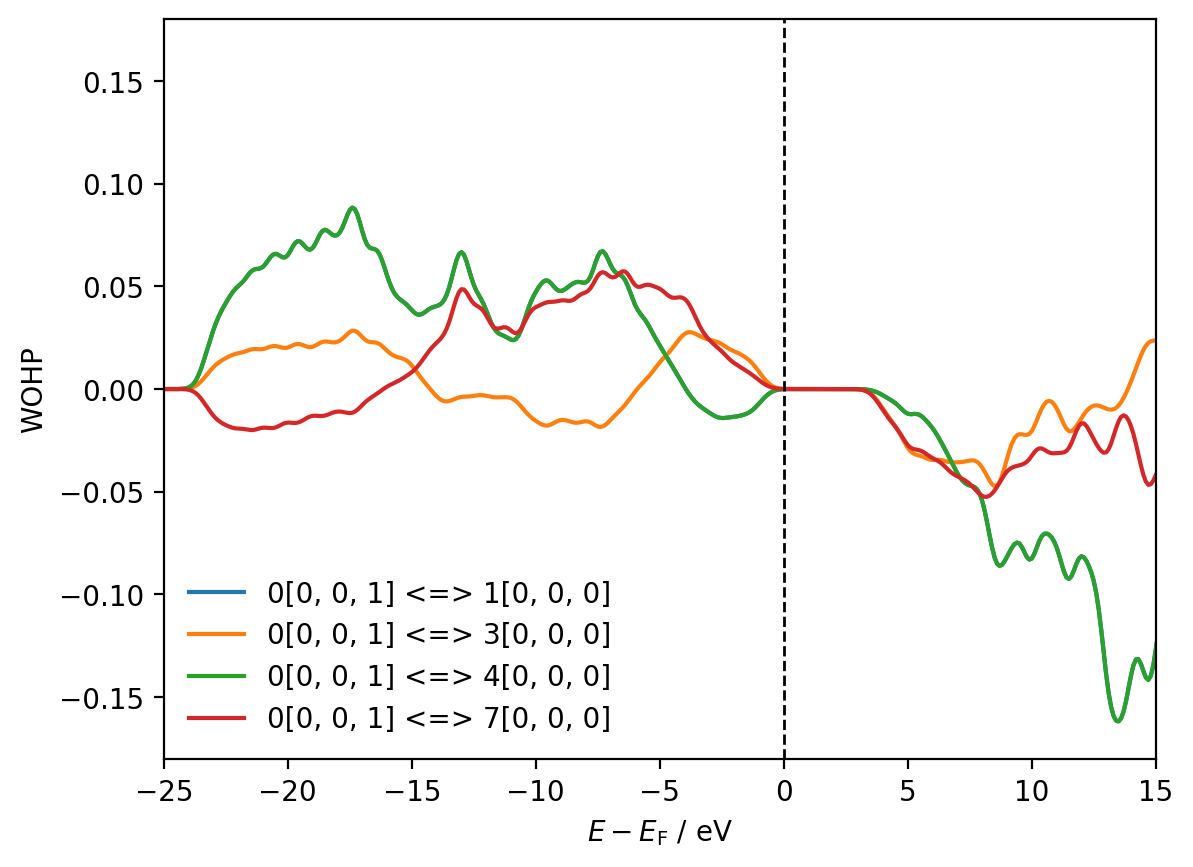

In [10]:
import matplotlib.pyplot as plt

shifted_energies = dcalc.energies - mu

fig, ax = plt.subplots()

for w_interaction in interactions[8, 9][0]:
    ax.plot(shifted_energies, w_interaction.wohp, label=f"{w_interaction.tag}")
    print(f"{w_interaction.tag} IWOHP = {w_interaction.iwohp:.2f}")

ax.axvline(x=0, color='black', ls='--', lw=1)

ax.set_xlim(-25, 15)
ax.set_ylim(-0.18, 0.18)

ax.set_xlabel(r'$E - E_{\mathrm{F}}$ / eV')
ax.set_ylabel('WOHP')

ax.legend(frameon=False)

plt.show()

0[0, 0, 1] <=> 1[0, 0, 0] IWOBI = 0.07
0[0, 0, 1] <=> 3[0, 0, 0] IWOBI = 0.02
0[0, 0, 1] <=> 4[0, 0, 0] IWOBI = 0.07
0[0, 0, 1] <=> 7[0, 0, 0] IWOBI = 0.05


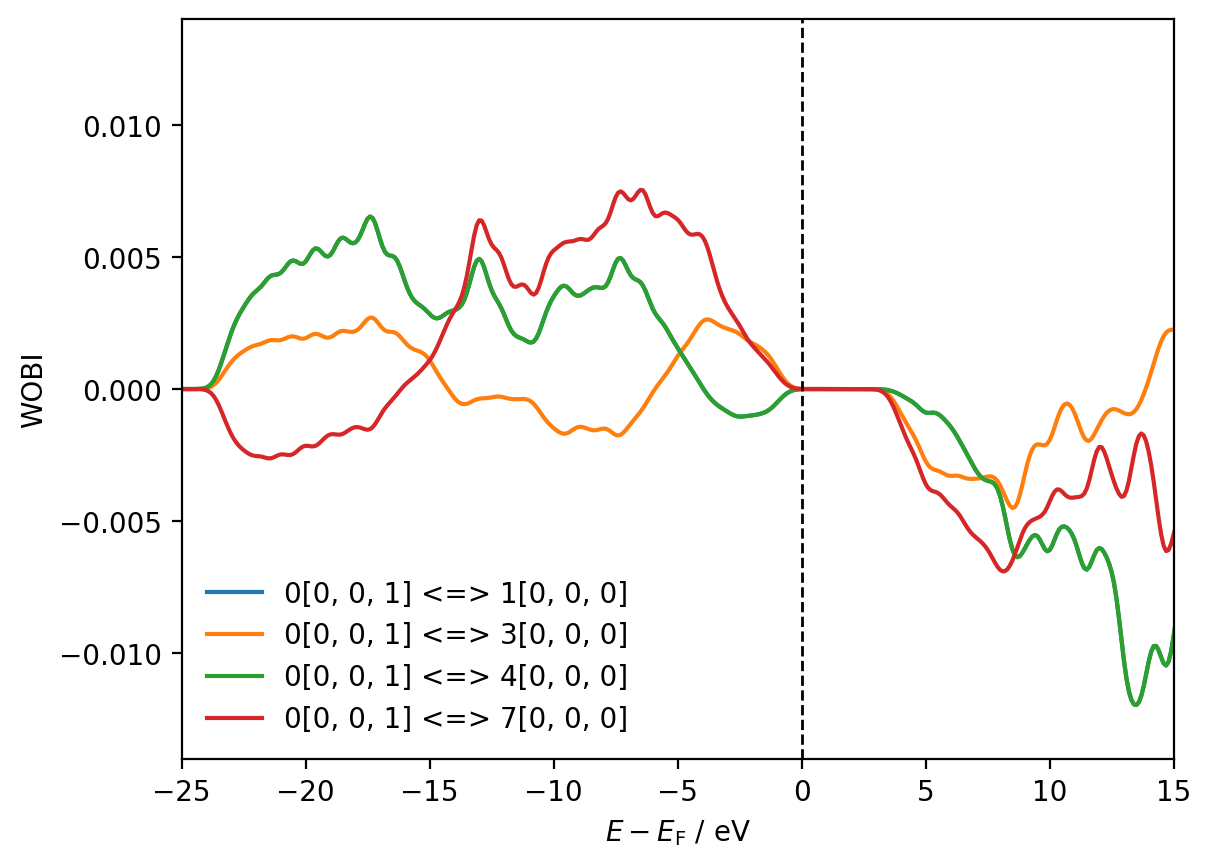

In [11]:
fig, ax = plt.subplots()

for w_interaction in interactions[8, 9][0]:
    ax.plot(shifted_energies, w_interaction.wobi, label=f"{w_interaction.tag}")
    print(f"{w_interaction.tag} IWOBI = {w_interaction.iwobi:.2f}")

ax.axvline(x=0, color='black', ls='--', lw=1)

ax.set_xlim(-25, 15)
ax.set_ylim(-0.014, 0.014)

ax.set_xlabel(r'$E - E_{\mathrm{F}}$ / eV')
ax.set_ylabel('WOBI')

ax.legend(frameon=False)

plt.show()

:::{note}
The WOHP and the WOBI arising from the interaction between Wannier function `0[0, 0, 1]` and Wannier function `1[0, 0, 0]` (blue line) are not visible in the plots above because they are overlapped almost exactly by the WOHP and the WOBI arising from the interaction between Wannier function `0[0, 0, 1]` and Wannier function `4[0, 0, 0]`.
:::

## k-resolved descriptors 

As well as resolving bonding descriptors with respect to individual Wannier functions, `pengwann` also facilitates the calculation of k-resolved descriptors:

In [12]:
interactions = dcalc.assign_descriptors(interactions, resolve_k=True)

print(interactions[8, 9].wohp.shape)

  0%|          | 0/16 [00:00<?, ?it/s]

(411, 4096)


As seen above, the total WOHP for the interaction between `C8` and `C9` now has shape `(411, 4096)`, which reflects its dimensions of $N_{\mathrm{energies}} \times N_{\mathrm{kpoints}}$:

In [13]:
print(len(dcalc.energies))
print(len(kpoints))

411
4096


We can therefore access the WOHP for a specific k-point by indexing for a particular column. For example, the first k-point in the k-point mesh (for this particular example) is the Gamma point at (0, 0, 0) in the Brillouin zone:

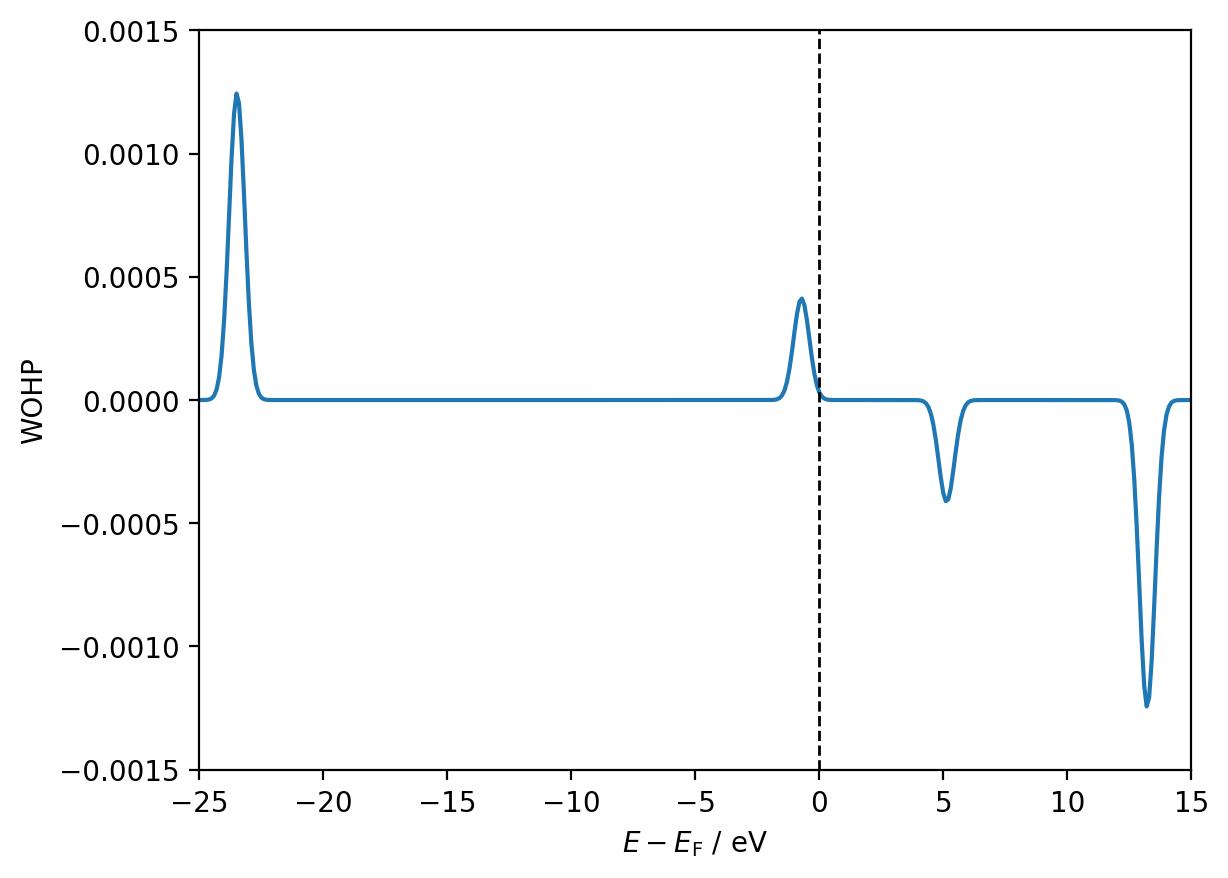

In [14]:
fig, ax = plt.subplots()

gamma_wohp = interactions[8, 9].wohp[:, 0]

ax.plot(shifted_energies, gamma_wohp)
ax.axvline(x=0, color='black', ls='--', lw=1)

ax.set_xlim(-25, 15)
ax.set_ylim(-0.0015, 0.0015)

ax.set_xlabel(r'$E - E_{\mathrm{F}}$ / eV')
ax.set_ylabel('WOHP')

plt.show()

We can calculate the k-resolved IWOHP in exactly the same way we would for the non-k-resolved case:

In [15]:
interactions = interactions.with_integrals(dcalc.energies, mu)

print(interactions[8, 9].iwohp.shape)

(4096,)


As indicated above, the `iwohp` attribute is now an array of $N_{\mathrm{kpoints}}$ values, so we can access the IWOHP for any individual k-point:

In [16]:
print(f"IWOHP at the Gamma point = {interactions[8, 9].iwohp[0]:.4f}")

IWOHP at the Gamma point = 0.0013
